<a href="https://colab.research.google.com/github/eovallemagallanes/Digital-Image-Processing/blob/main/lecture13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Morphological operators

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import skimage
import skimage.color as skic
import skimage.filters as skif
import skimage.data as skid
import skimage.util as sku

from skimage import io
from skimage import morphology
from skimage.filters import threshold_otsu
from skimage.morphology import disk, diamond, star

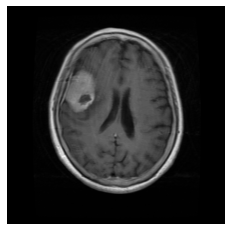

In [19]:
img =  io.imread('45.png')[..., 0]#skimage.img_as_float(skid.coins())*255.0 #
cropped = img #img[40:452,80:432]
plt.imshow(cropped, cmap='gray')
plt.axis('off')
plt.show()

In [6]:
from ipywidgets import widgets
from ipywidgets import interact, interactive, fixed, interact_manual
from ipywidgets import FloatSlider, Checkbox

In [7]:
def segmentation(img, thresh):
    #thresh = threshold_otsu(cropped)
    binary = img > thresh

    fig, axes = plt.subplots(ncols=3, figsize=(8, 2.5))
    ax = axes.ravel()
    ax[0] = plt.subplot(1, 3, 1)
    ax[1] = plt.subplot(1, 3, 2)
    ax[2] = plt.subplot(1, 3, 3, sharex=ax[0], sharey=ax[0])

    ax[0].imshow(img, cmap=plt.cm.gray)
    ax[0].set_title('Original')
    ax[0].axis('off')

    ax[1].hist(img.ravel(), bins=256)
    ax[1].set_title('Histogram')
    ax[1].axvline(thresh, color='r')

    ax[2].imshow(binary, cmap=plt.cm.gray)
    ax[2].set_title('Thresholded')
    ax[2].axis('off')

    plt.show()

    return binary

In [20]:
threshold_widget = FloatSlider(min=0, max=255, step=1, value=110, continuous_update=False)

w = interactive(segmentation,img=fixed(cropped), thresh=threshold_widget);
display(w)

interactive(children=(FloatSlider(value=110.0, continuous_update=False, description='thresh', max=255.0, step=…

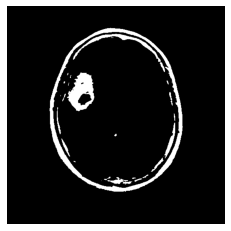

In [21]:
bin_img = w.result
plt.imshow(bin_img, cmap='gray')
plt.axis('off')
plt.show()

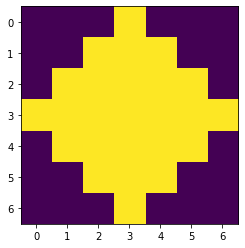

In [22]:
selem = diamond(3)
plt.imshow(selem)
#plt.axis('off')
plt.show()

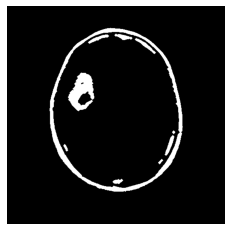

In [23]:
op_img = morphology.binary_opening(bin_img, selem)
plt.imshow(op_img, cmap='gray')
plt.axis('off')
plt.show()

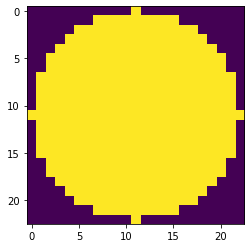

In [24]:
selem = disk(11)
plt.imshow(selem)
#plt.axis('off')
plt.show()

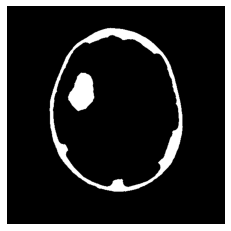

In [25]:
clos_img = morphology.binary_closing(op_img, selem)
plt.imshow(clos_img, cmap='gray')
plt.axis('off')
plt.show()